# Lesson 6 - Starter Code

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf



### Objective:  Last class we started exploring the citi bike data. Tonight we will build multiple models and learn how to evaluate their quality. 

Let's get started!

In [5]:
wd = '../../assets/dataset/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Building on your work from last class. Explore this data set. Complete summary stats you think will help you understand the data. Do you have any missing variables? 

In [8]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Wow! no missing values!

#### Create dummies. Try refactoring the code below using the prefix options on get_dummies
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4'],
      dtype='object')
               temp  weather_1  weather_2  weather_3
temp       1.000000   0.101044  -0.069657  -0.062406
weather_1  0.101044   1.000000  -0.822961  -0.412414
weather_2 -0.069657  -0.822961   1.000000  -0.177417
weather_3 -0.062406  -0.412414  -0.177417   1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


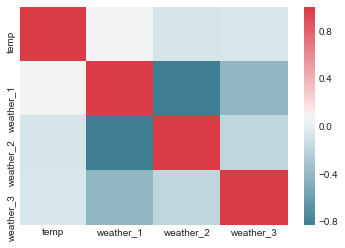

In [16]:
#starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
#join those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)





### Check the frequencies of your categories should you combine any of your categories? Try models with a couple of different versions

In [20]:
y = bikemodel_data['casual']
lm = smf.ols(formula = 'y ~ weather_1 + weather_2 + weather_3', data=bikemodel_data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           8.08e-89
Time:                        14:41:14   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6667     28.134      0.095      0.924     -52.478      57.812
weather_1     37.8788     28.138      1.346      0.178     -17.274      93.031
weather_2     26.9286     28.143      0.957      0.339     -28.235      82.092
weather_3     13.3890     28.164      0.475      0.635     -41.814      68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's try adding dummies for hours of day.

In [22]:
hours = pd.get_dummies(bike_data.hr)
hours.columns = ['hour_' + str(i) for i in hours.columns]

bikemodel_data = bikemodel_data.join(hours)

ValueError: columns overlap but no suffix specified: Index([u'hour_0', u'hour_1', u'hour_2', u'hour_3', u'hour_4', u'hour_5',
       u'hour_6', u'hour_7', u'hour_8', u'hour_9', u'hour_10', u'hour_11',
       u'hour_12', u'hour_13', u'hour_14', u'hour_15', u'hour_16', u'hour_17',
       u'hour_18', u'hour_19', u'hour_20', u'hour_21', u'hour_22', u'hour_23'],
      dtype='object')

In [27]:
bikemodel_data.columns

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4', u'hour_0', u'hour_1',
       u'hour_2', u'hour_3', u'hour_4', u'hour_5', u'hour_6', u'hour_7',
       u'hour_8', u'hour_9', u'hour_10', u'hour_11', u'hour_12', u'hour_13',
       u'hour_14', u'hour_15', u'hour_16', u'hour_17', u'hour_18', u'hour_19',
       u'hour_20', u'hour_21', u'hour_22', u'hour_23'],
      dtype='object')

               temp       hum  windspeed  weather_1  weather_2  weather_3  \
temp       1.000000 -0.069881  -0.023125   0.101044  -0.069657  -0.062406   
hum       -0.069881  1.000000  -0.290105  -0.383425   0.220758   0.309737   
windspeed -0.023125 -0.290105   1.000000   0.005150  -0.049241   0.070018   
weather_1  0.101044 -0.383425   0.005150   1.000000  -0.822961  -0.412414   
weather_2 -0.069657  0.220758  -0.049241  -0.822961   1.000000  -0.177417   
weather_3 -0.062406  0.309737   0.070018  -0.412414  -0.177417   1.000000   
holiday   -0.027340 -0.010588   0.003988   0.009167   0.004910  -0.023664   
hour_1    -0.040738  0.083197  -0.053580   0.008819  -0.006750  -0.005379   
hour_2    -0.045627  0.096198  -0.060241   0.005156  -0.003921  -0.002518   
hour_3    -0.046575  0.108659  -0.065444  -0.001685   0.003843  -0.003117   
hour_4    -0.053459  0.121990  -0.057285  -0.000450   0.000506   0.000096   
hour_5    -0.065571  0.124406  -0.067411  -0.004791   0.011541  -0.010083   

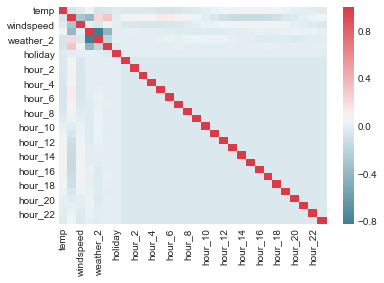

In [28]:
columns_to_keep = ['temp', 'hum', 'windspeed', 'weather_1', 'weather_2', 'weather_3', 'holiday',]
columns_to_keep.extend(['hour_' + str(i) for i in range(1, 24)])

correlations = bikemodel_data[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [31]:
lm2 = smf.ols(formula = "y ~ weather_1 + weather_2 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20", data = bikemodel_data).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     557.5
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:48:59   Log-Likelihood:                -88987.
No. Observations:               17379   AIC:                         1.780e+05
Df Residuals:                   17363   BIC:                         1.781e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9698      1.129     -9.716      0.000     -13.183      -8.757
weather_1     25.6265      1.140     22.483      0.000      23.392      27.861
weather_2     14.9891      1.233     12.152      0.000      12.571      17.407
hour_8        12.4180      1.571      7.905      0.000       9.339      15.497
hour_9        21.7083      1.571     13.815      0.000      18.628      24.788
hour_10       37.0542      1.571     23.587      0.000      33.975      40.133
hour_11       49.9498      1.571     31.793      0.000      46.870      53.029
hour_12       58.9340      1.570     37.538      0.000      55.857      62.011
hour_13       62.7259      1.569     39.988      0.000      59.651      65.800
hour_14       65.8863      1.569     42.006      0.000      62.812      68.961
hour_15       65.1661      1.569     41.545      0.000      62.092      68.241
hour_16       63.7316      1.568     40.646      0.000      60.658      66.805
hour_17       64.4273      1.568     41.085      0.000      61.354      67.501
hour_18       51.2369      1.570     32.639      0.000      48.160      54.314
hour_19       38.5286      1.570     24.545      0.000      35.452      41.605
hour_20       26.0161      1.570     16.569      0.000      22.938      29.094
==============================================================================
Omnibus:                     8166.072   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58628.804
Skew:                           2.141   Prob(JB):                         0.00
Kurtosis:                      10.914   Cond. No.                         9.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So it looks like brute-force adding some more parameters improves the model somewhat.

## Pair Programming Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 
* Iterate through a few versions of the models and track how your variables are classified. 
* Write a sentence that explains the findings for each variable. Indicate if the finding is statistically significant 
* Try making a chart like this one to track your models




Model | adj R^2 | SE | 95% CI or P-value
--| --| -- | -- 
Crude | 0.4 | 2.0 | feature 1: (10.2, 12.2)
Model 1|  | | feature 1: (a,b)  feature 2: (c,d)

* Pick one continus vairable and create quartiles instead. Turn those quartiles into dummies. Compare your adj R2 
* Try making other adjustments to your features/variables 
* Pick a final model to present to the class.


### You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [ ]:
#your code here...

In [ ]:
#and here 

In [ ]:
#add as many cells as you need :) 

#### 1: What's the strongest predictor? 

Answer:

#### 2: How well did your model do? 

Answer:

#### 3: How can you improve it? 

Answer:

### Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders (aka commuters). Hypothesize which features may impact commuters differently than causual riders? Test your hypothesis. 

Bonus 1: What's the strongest predictor? 

Bonus 2: How well did your model do? 

Bonus 3: How can you improve it? 